In [2]:
import sys
sys.path.insert(0,'/home/pawel1/Pulpit/Astrophysics/CTA/soft/ctapipe_io_lst')
sys.path.insert(0, '/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')

from ctapipe_io_lst import LSTEventSource
from traitlets.config.loader import Config 

import matplotlib.pyplot as plt
import numpy as np
from numba import njit, prange

from ctapipe.image.extractor import LocalPeakWindowSum
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

from lstchain.calib.camera.r0 import LSTR0Corrections

from tools import get_first_capacitor
from simple_extracor import extract_pulse_time

In [3]:
config_corr = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/media/pawel1/ADATA HD330/20190215/pedestal_run97_new.fits",
        "offset":  400,
        "tel_id": 0
    }
})

#input_file_1 = "/media/pawel1/ADATA HD330/20190226/LST-1.*.Run00171.0000.fits.fz"
input_file_1 = "/media/pawel1/ADATA HD330/20190312/LST-1.*.Run00252.0000.fits.fz"

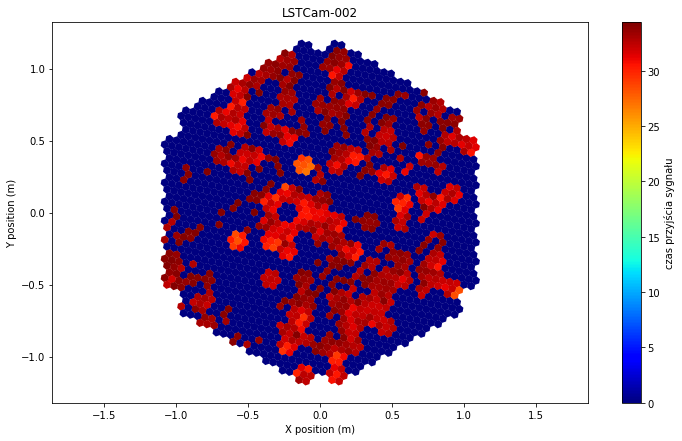

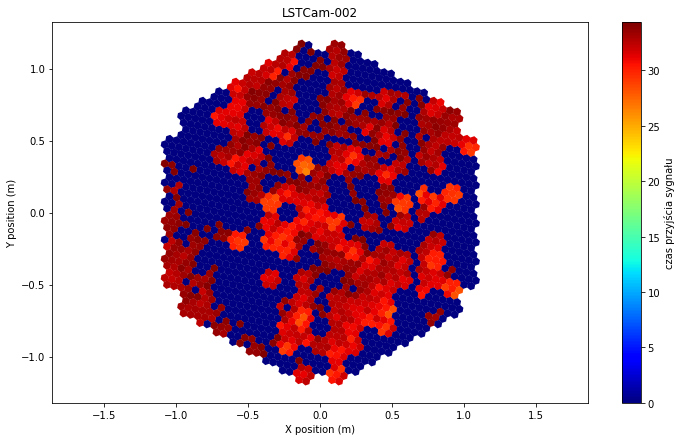

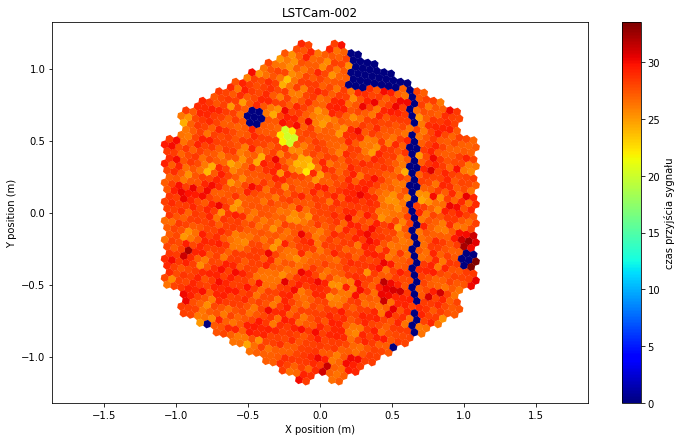

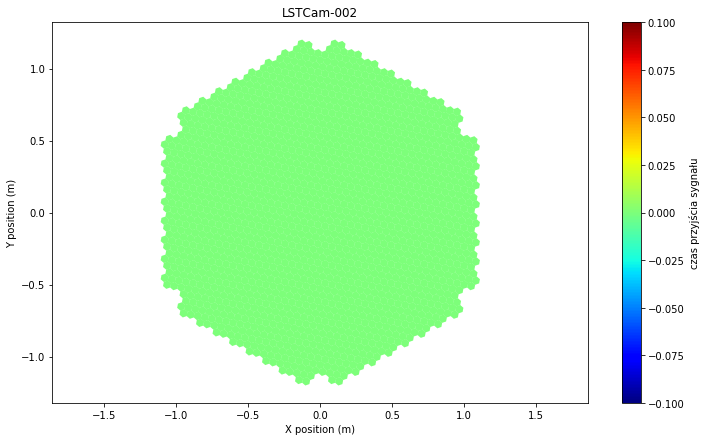

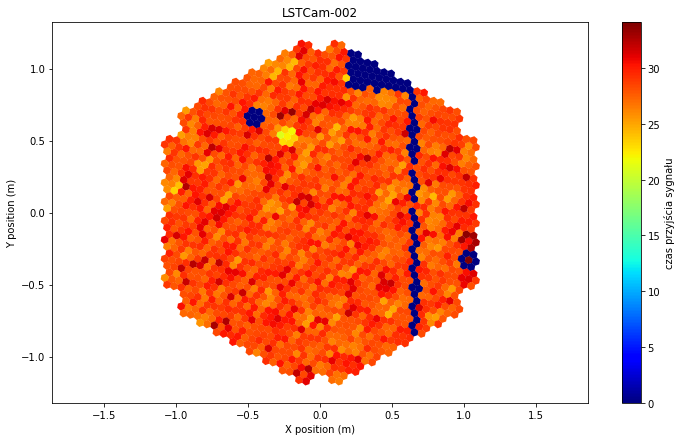

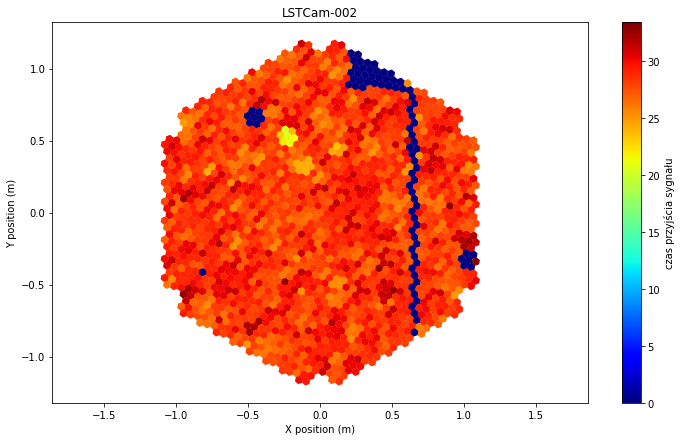

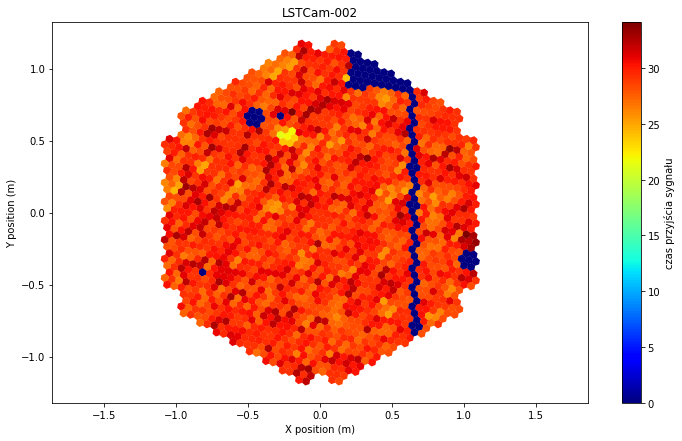

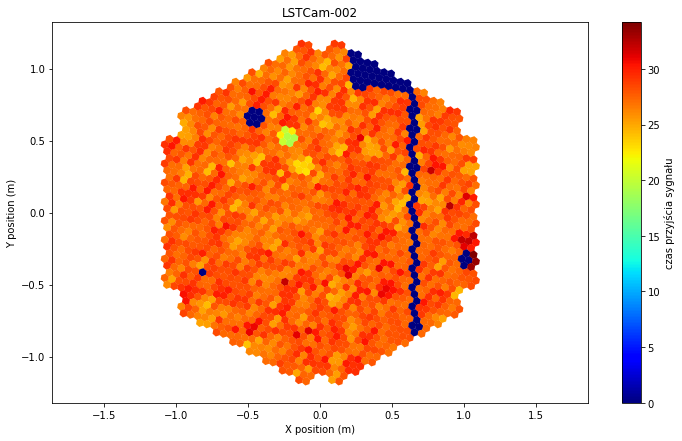

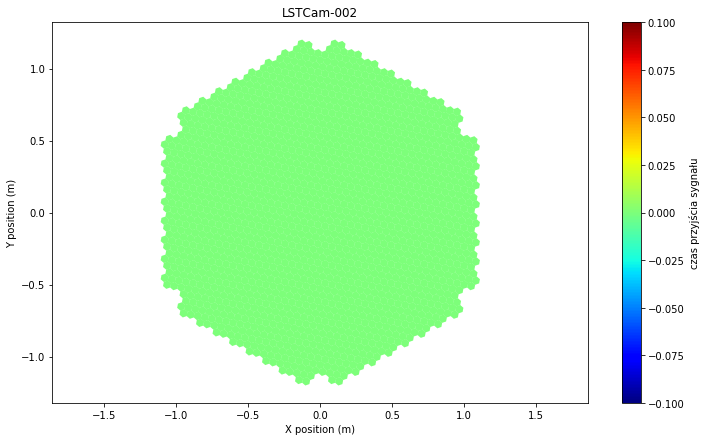

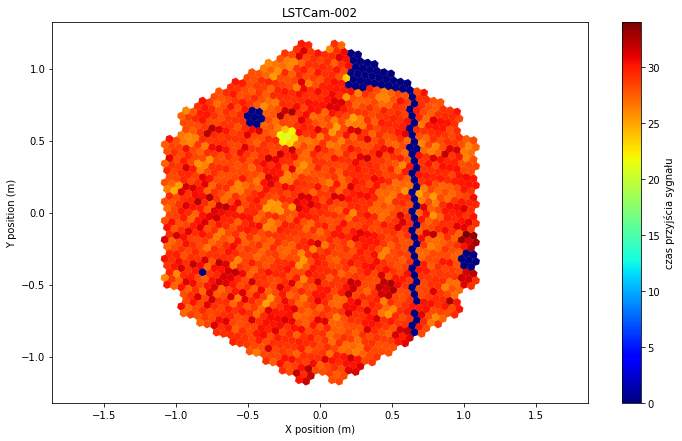

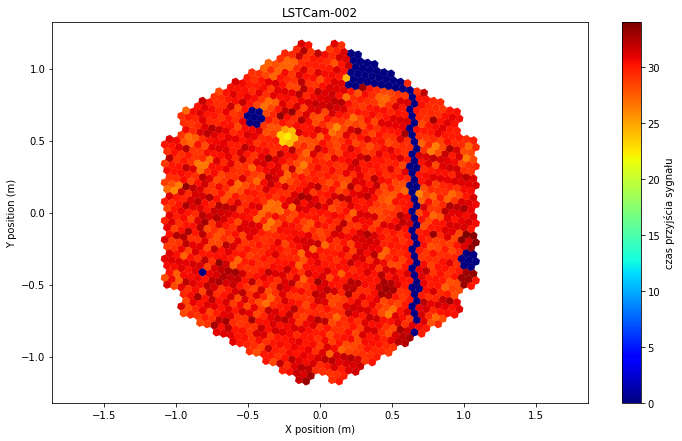

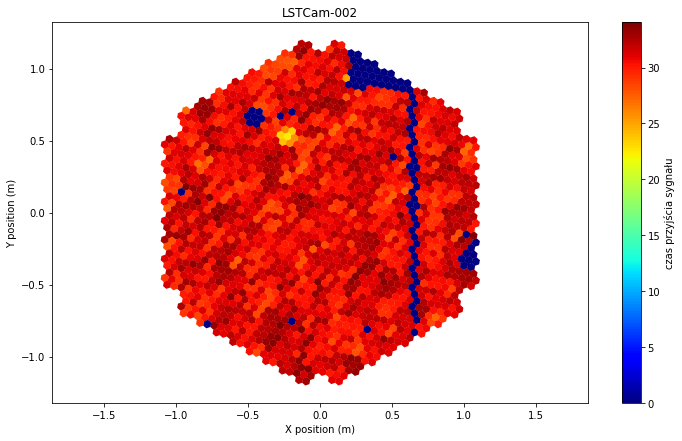

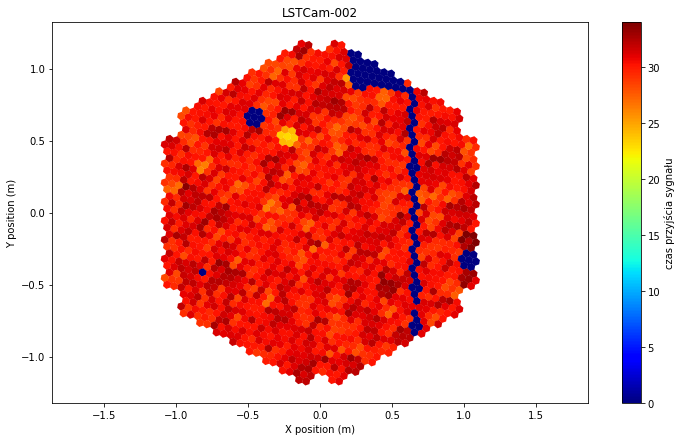

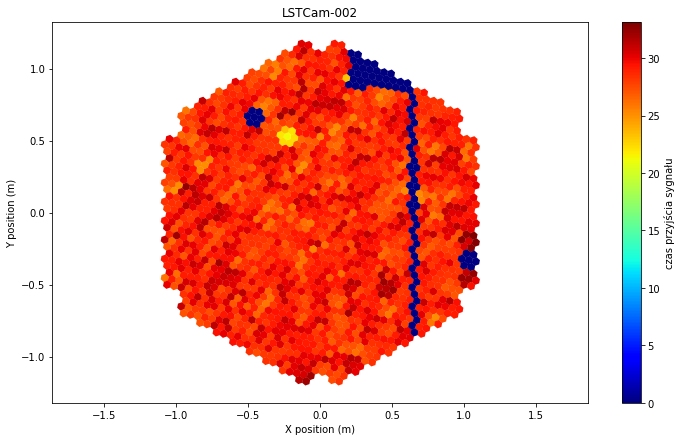

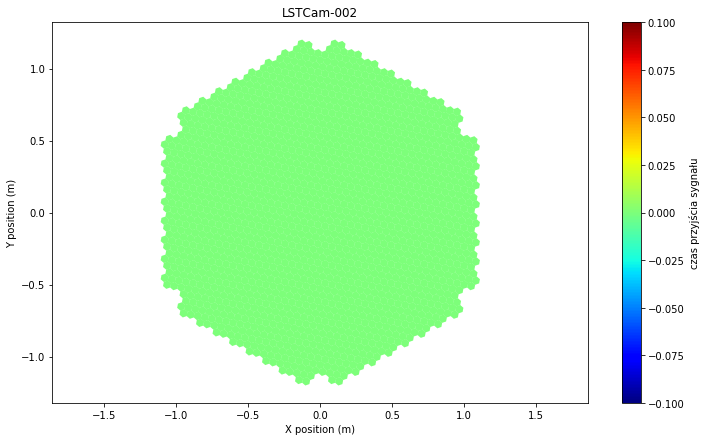

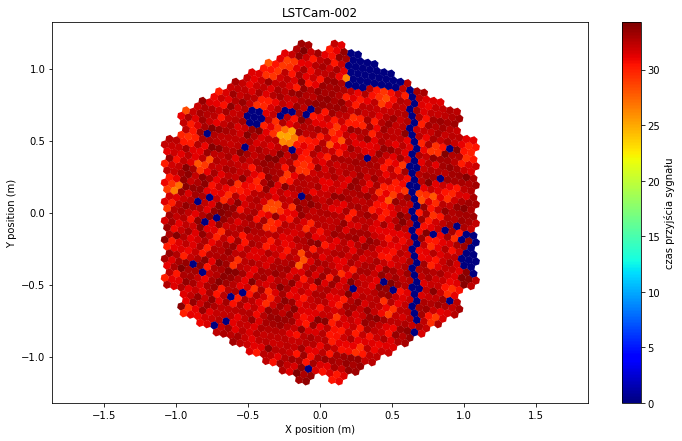

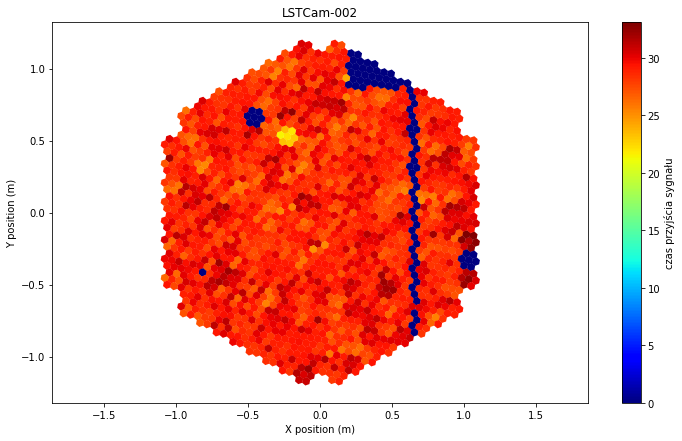

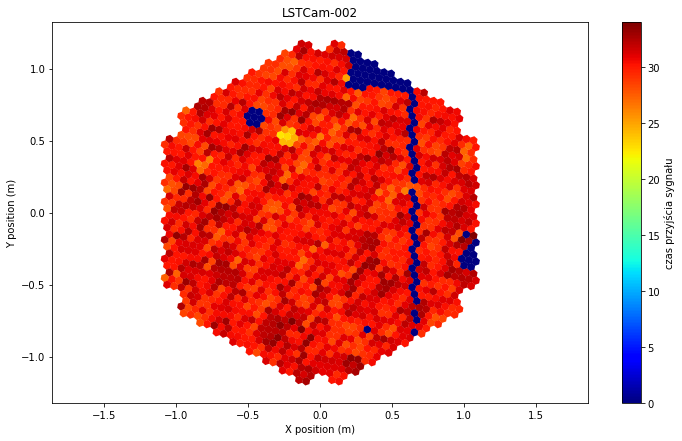

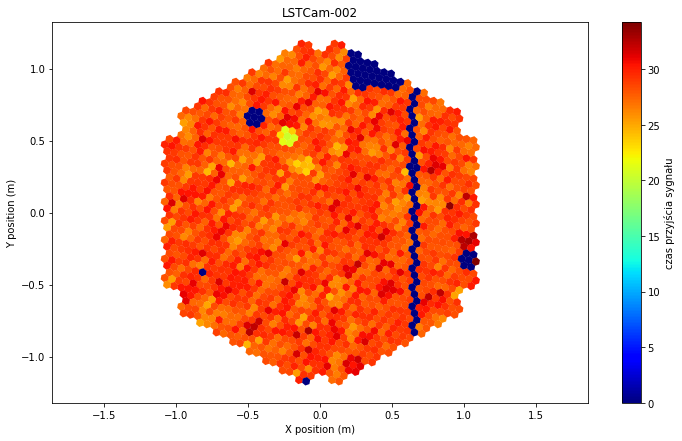

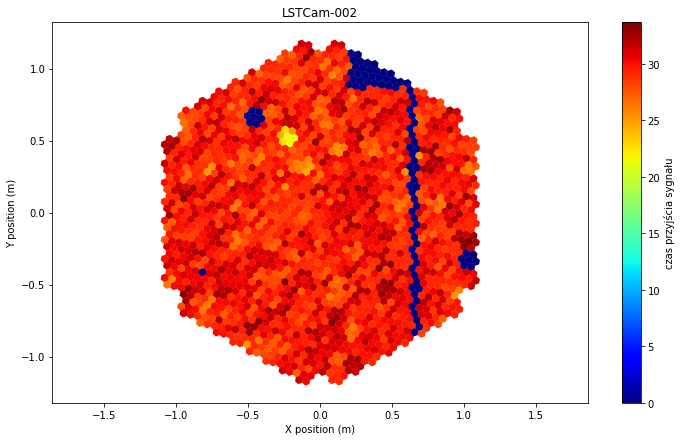

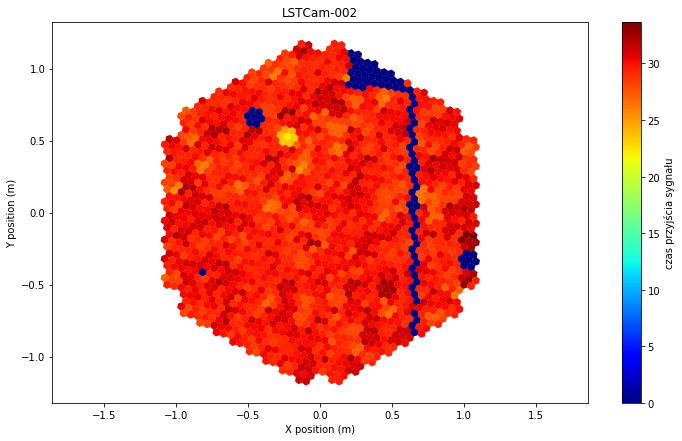

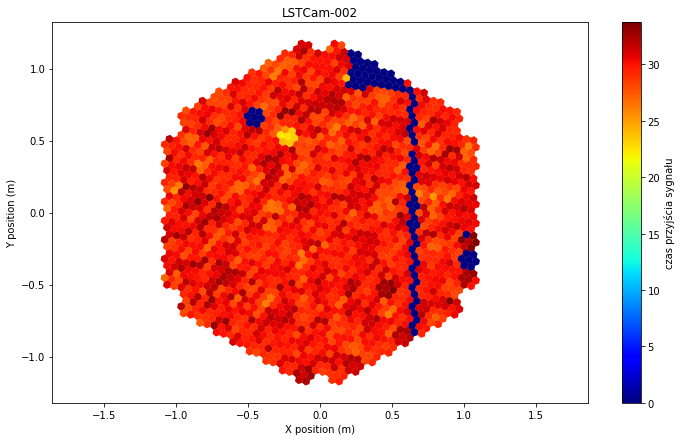

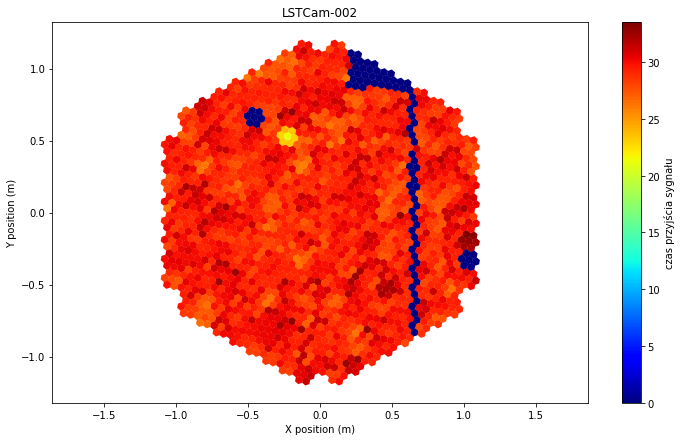

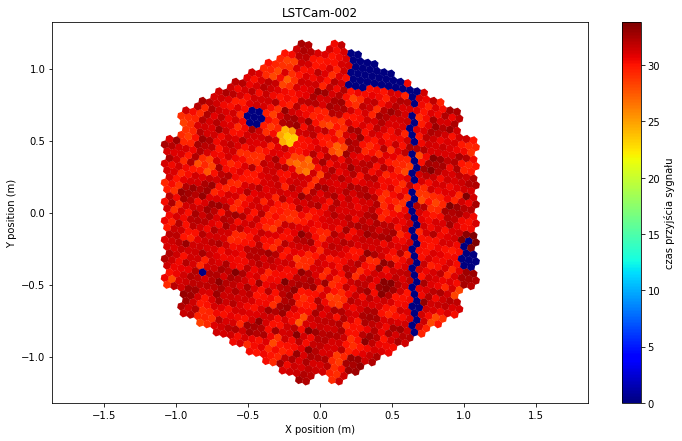

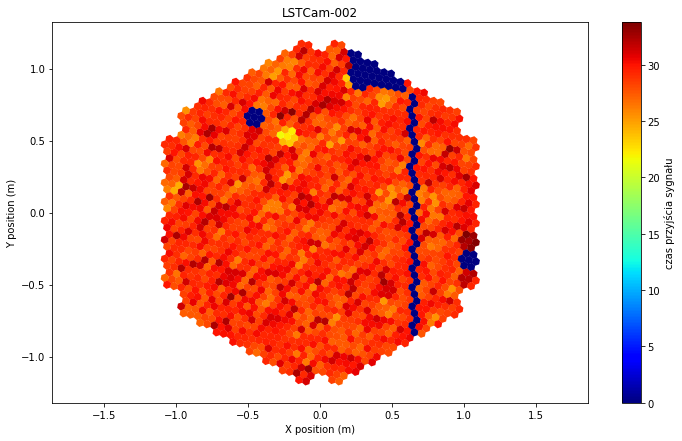

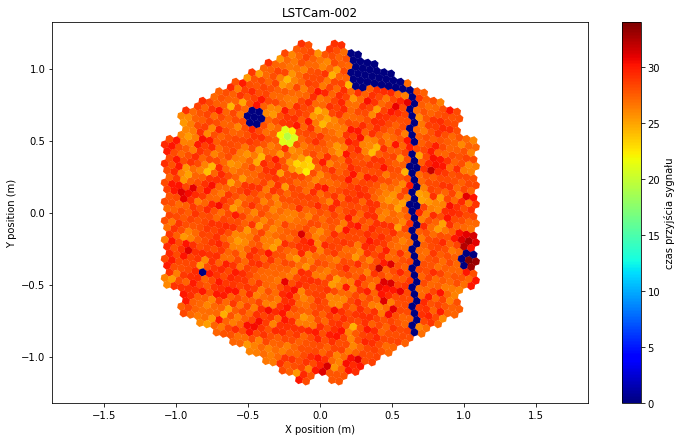

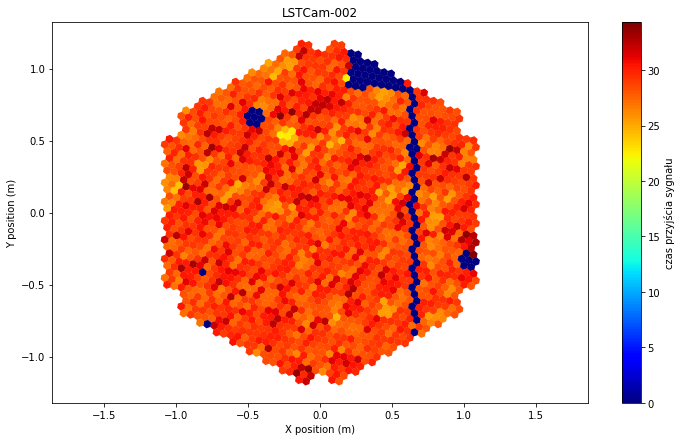

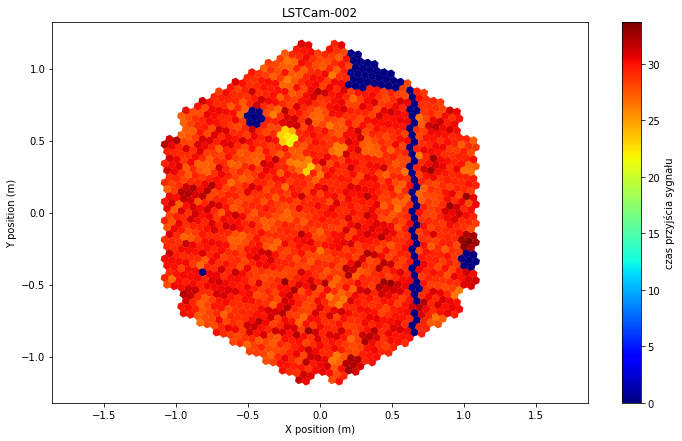

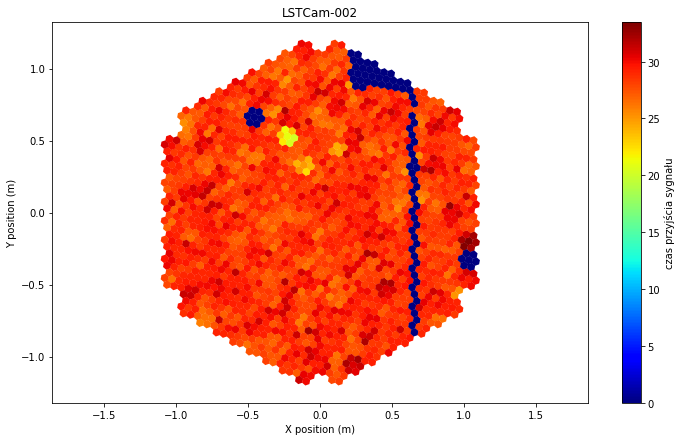

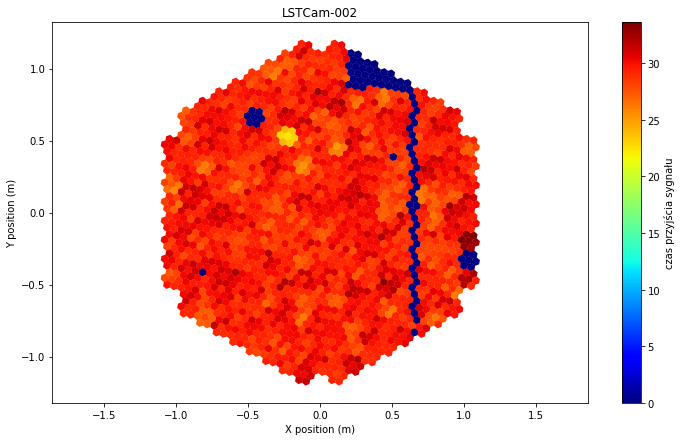

In [15]:
reader = LSTEventSource(input_url=input_file_1, max_events=30)
lst_r0 = LSTR0Corrections(config=config_corr)

for i, ev in enumerate(reader):
    lst_r0.calibrate(ev)
    fig, ax = plt.subplots(figsize=(12,7))
    disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax)
    disp0.cmap = 'jet'
    
    baseline_subtracted = ev.r1.tel[0].waveform[:, :, 2:38] - 300
    charge, pulse = extractor(baseline_subtracted)
    t = extract_pulse_time(baseline_subtracted[0, :])
    
    t[np.where(charge[0, :]<4000)] = 0
    disp0.image = t
    disp0.add_colorbar(ax=ax, label="czas przyjścia sygnału")
    plt.show()

In [6]:
wave = ev.r1.tel[0].waveform[0, :, 2:38]

In [34]:
t = extract_pulse_time(wave)

In [40]:
t[np.where(charge[0, :]<4000)] = 0

In [5]:
extractor = LocalPeakWindowSum()

In [7]:
baseline_subtracted = ev.r1.tel[0].waveform[:, :, 2:38] - 380
charge, pulse = extractor(baseline_subtracted)

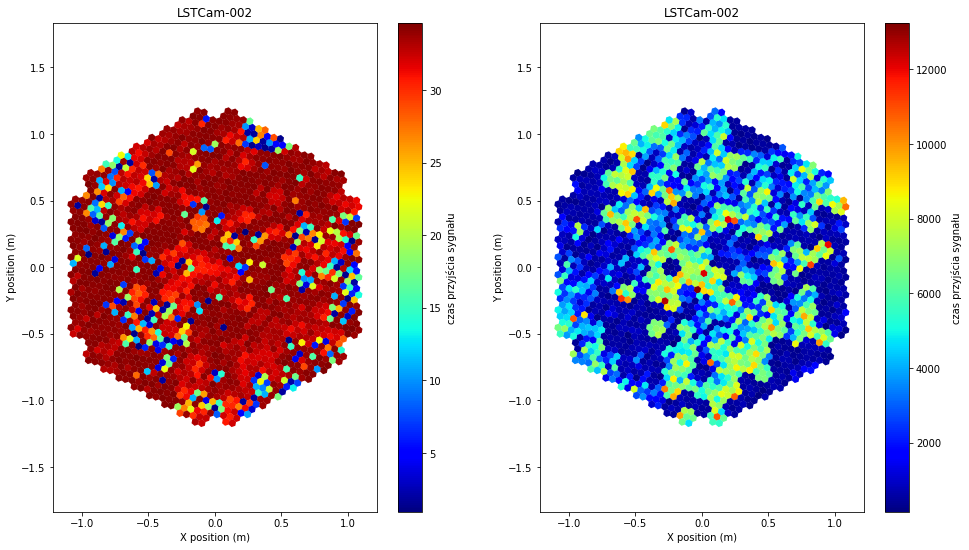

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[0])
disp0.cmap = 'jet'
disp0.image = pulse[0, :]
#disp0.image = charge[0, :]
disp0.add_colorbar(ax=ax[0], label="czas przyjścia sygnału")
#disp0.set_limits_minmax(0.5, 2.5) 

disp1 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[1])
disp1.cmap = 'jet'
#disp0.image = extract_pulse_time(wave - 380)
disp1.image = charge[0, :]
disp1.add_colorbar(ax=ax[1], label="czas przyjścia sygnału")